In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sas
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,auc,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("company.csv")

In [3]:
data.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


In [4]:
data.shape

(4256, 51)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

In [6]:
data["target"] = np.where(data["Networth Next Year"]>0,1,0)

In [7]:
data.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE,target
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN,1
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN,1
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN,1
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN,1
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN,1


In [8]:
data.describe()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE,target
count,4256.000000,4256.000000,4.256000e+03,4256.000000,4.025000e+03,3706.000000,4.091000e+03,4102.000000,4102.000000,4102.000000,...,3382.000000,3492.000000,3828.000000,3.446000e+03,3446.000000,4256.000000,4256.000000,4.256000e+03,1629.000000,4256.000000
mean,2128.500000,1344.740883,3.573617e+03,1351.949601,4.688190e+03,43.702482,4.356301e+03,295.050585,605.940639,410.259044,...,84.369988,28.684513,17.733926,2.376491e+07,-1094.828671,-196.217467,-197.527608,3.573617e+03,55.462290,0.787594
std,1228.745702,15936.743168,3.007444e+04,12961.311651,5.391895e+04,436.915048,5.139809e+04,3079.902071,5646.230633,4217.415307,...,562.637359,169.650915,343.125864,1.709790e+08,34101.358644,13061.953425,13061.929512,3.007444e+04,1304.445296,0.409059
min,1.000000,-74265.600000,1.000000e-01,0.000000,0.000000e+00,-3029.400000,-1.000000e-01,-3908.300000,-440.700000,-3894.800000,...,-0.090000,-0.180000,-2.000000,-2.147484e+09,-999998.900000,-843181.820000,-843181.820000,1.000000e-01,-1116.640000,0.000000
25%,1064.750000,3.975000,9.130000e+01,31.475000,1.071000e+02,-1.800000,9.680000e+01,0.500000,6.925000,0.800000,...,8.190000,5.100000,3.020000,1.308382e+06,10.000000,0.000000,0.000000,9.130000e+01,2.970000,1.000000
50%,2128.500000,72.100000,3.155000e+02,104.800000,4.551000e+02,1.600000,4.268000e+02,9.000000,36.900000,12.600000,...,17.320000,9.860000,6.410000,4.750000e+06,10.000000,1.490000,1.240000,3.155000e+02,8.690000,1.000000
75%,3192.250000,330.825000,1.120800e+03,389.850000,1.485000e+03,18.400000,1.395700e+03,53.300000,158.700000,74.175000,...,40.012500,20.240000,11.822500,1.090602e+07,10.000000,10.000000,7.615000,1.120800e+03,17.000000,1.000000
max,4256.000000,805773.400000,1.176509e+06,613151.600000,2.442828e+06,14185.500000,2.366035e+06,119439.100000,208576.500000,145292.600000,...,17947.600000,5651.400000,21092.000000,4.130401e+09,100000.000000,34522.530000,34522.530000,1.176509e+06,51002.740000,1.000000


In [9]:
data.isnull().sum()

Num                                               0
Networth Next Year                                0
Total assets                                      0
Net worth                                         0
Total income                                    231
Change in stock                                 550
Total expenses                                  165
Profit after tax                                154
PBDITA                                          154
PBT                                             154
Cash profit                                     154
PBDITA as % of total income                      79
PBT as % of total income                         79
PAT as % of total income                         79
Cash profit as % of total income                 79
PAT as % of net worth                             0
Sales                                           305
Income from fincial services                   1111
Other income                                   1556
Total capita

In [10]:
data = data.drop(["PE on BSE","Investments","Contingent liabilities","Deferred tax liability","Other income","Income from fincial services"],axis = 1)

In [11]:
data.shape

(4256, 46)

# missiing value

In [12]:
data.mean(axis =0)

Num                                            2.128500e+03
Networth Next Year                             1.344741e+03
Total assets                                   3.573617e+03
Net worth                                      1.351950e+03
Total income                                   4.688190e+03
Change in stock                                4.370248e+01
Total expenses                                 4.356301e+03
Profit after tax                               2.950506e+02
PBDITA                                         6.059406e+02
PBT                                            4.102590e+02
Cash profit                                    4.082675e+02
PBDITA as % of total income                    3.179892e+00
PBT as % of total income                      -1.819683e+01
PAT as % of total income                      -2.003367e+01
Cash profit as % of total income              -9.021278e+00
PAT as % of net worth                          1.016786e+01
Sales                                   

In [13]:
data.isnull().sum()

Num                                              0
Networth Next Year                               0
Total assets                                     0
Net worth                                        0
Total income                                   231
Change in stock                                550
Total expenses                                 165
Profit after tax                               154
PBDITA                                         154
PBT                                            154
Cash profit                                    154
PBDITA as % of total income                     79
PBT as % of total income                        79
PAT as % of total income                        79
Cash profit as % of total income                79
PAT as % of net worth                            0
Sales                                          305
Total capital                                    5
Reserves and funds                              98
Borrowings                     

In [14]:
data= data.fillna(value = data.mean(axis = 0))

In [15]:
data.mean(axis = 0)

Num                                            2.128500e+03
Networth Next Year                             1.344741e+03
Total assets                                   3.573617e+03
Net worth                                      1.351950e+03
Total income                                   4.688190e+03
Change in stock                                4.370248e+01
Total expenses                                 4.356301e+03
Profit after tax                               2.950506e+02
PBDITA                                         6.059406e+02
PBT                                            4.102590e+02
Cash profit                                    4.082675e+02
PBDITA as % of total income                    3.179892e+00
PBT as % of total income                      -1.819683e+01
PAT as % of total income                      -2.003367e+01
Cash profit as % of total income              -9.021278e+00
PAT as % of net worth                          1.016786e+01
Sales                                   

In [16]:
data.isnull().sum()

Num                                            0
Networth Next Year                             0
Total assets                                   0
Net worth                                      0
Total income                                   0
Change in stock                                0
Total expenses                                 0
Profit after tax                               0
PBDITA                                         0
PBT                                            0
Cash profit                                    0
PBDITA as % of total income                    0
PBT as % of total income                       0
PAT as % of total income                       0
Cash profit as % of total income               0
PAT as % of net worth                          0
Sales                                          0
Total capital                                  0
Reserves and funds                             0
Borrowings                                     0
Current liabilities 

In [17]:
data = data.drop(["Num","Networth Next Year"],axis =1)

In [18]:
data.shape

(4256, 44)

# BIvariate analysis

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

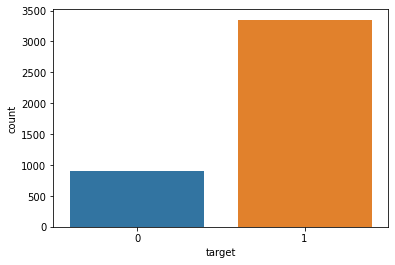

In [19]:
sas.countplot(data["target"])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


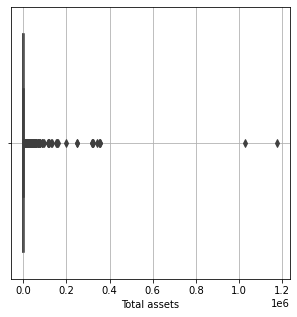

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


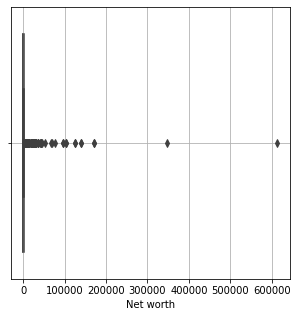

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


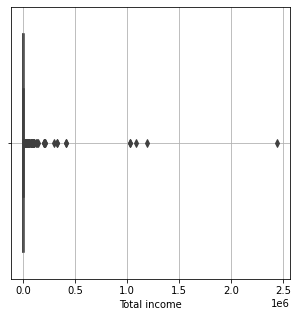

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


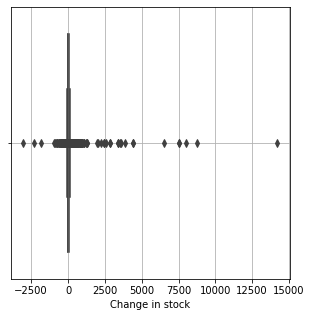

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


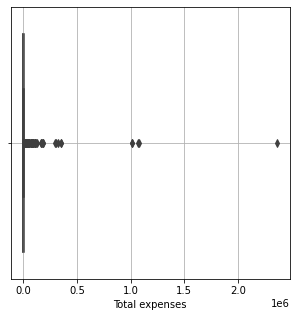

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


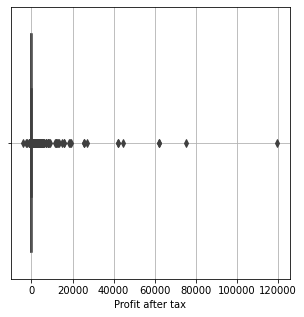

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


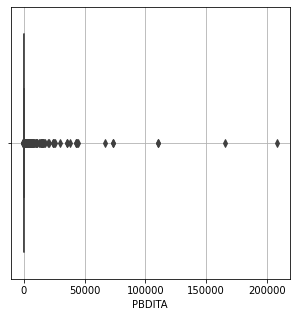

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


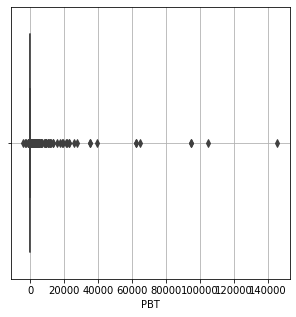

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


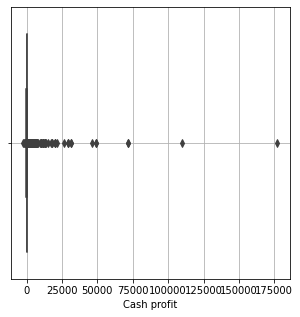

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


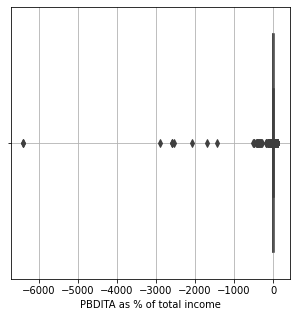

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


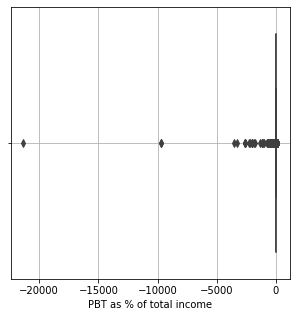

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


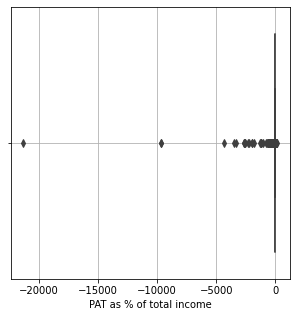

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


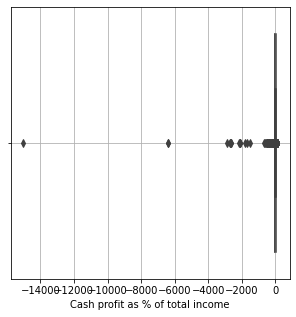

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


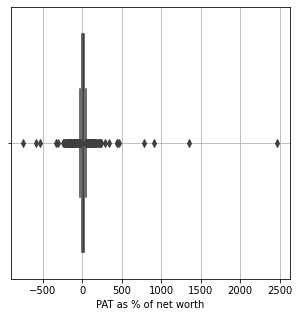

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


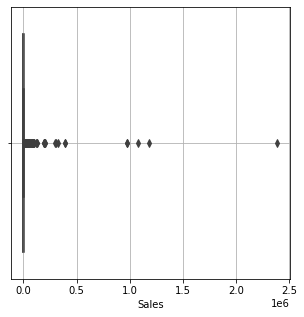

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


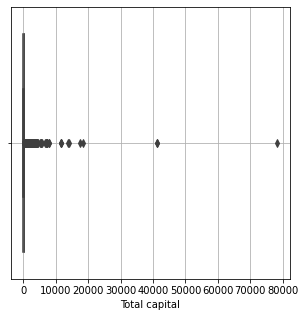

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


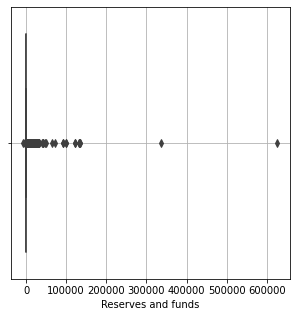

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


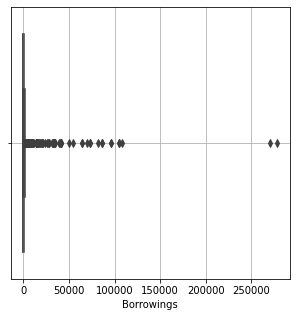

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


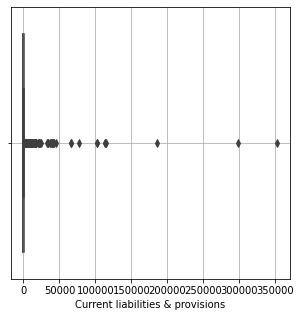

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


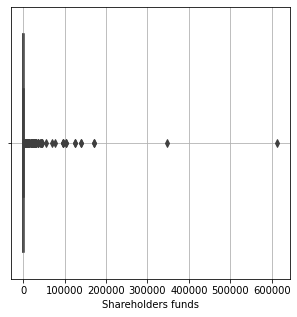

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


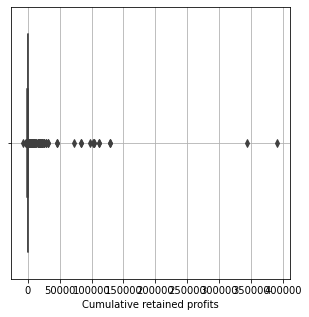

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


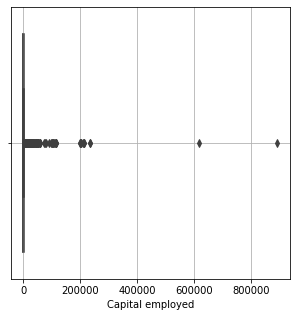

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


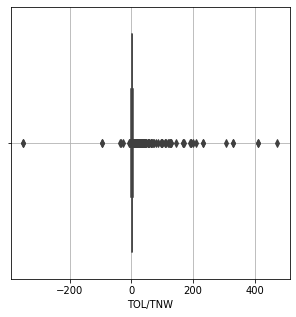

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


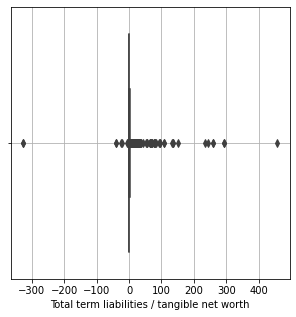

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


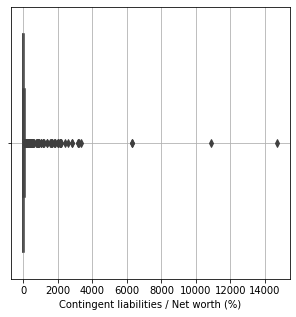

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


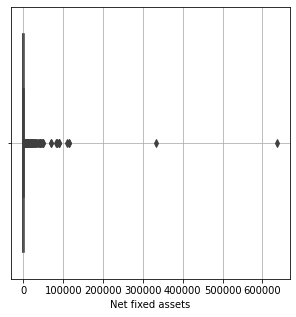

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


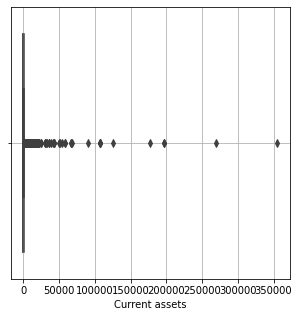

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


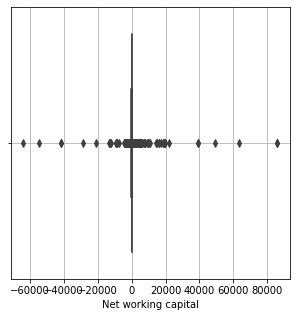

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


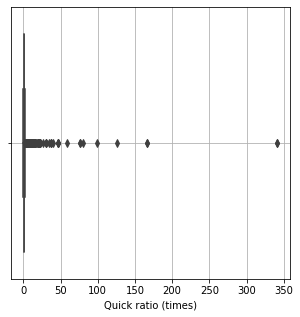

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


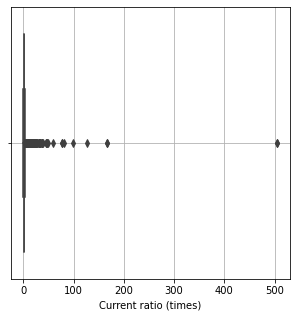

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


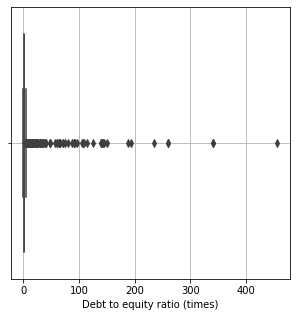

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


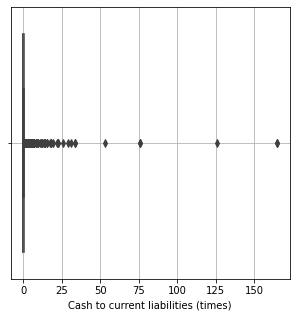

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


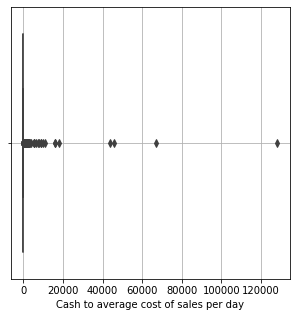

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


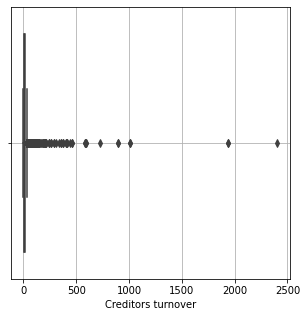

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


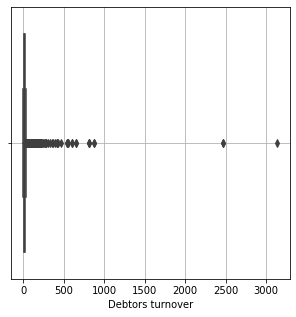

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


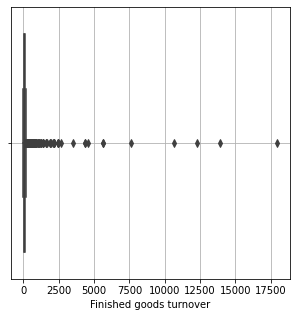

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


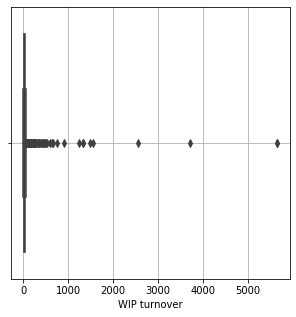

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


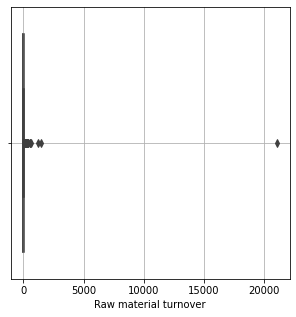

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


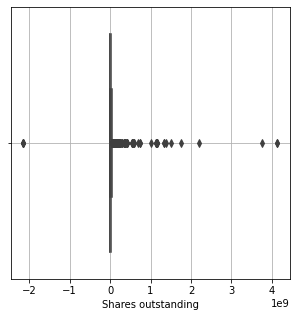

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


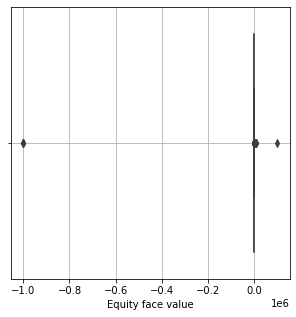

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


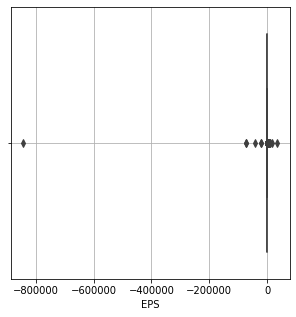

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


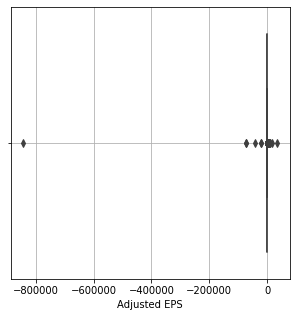

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


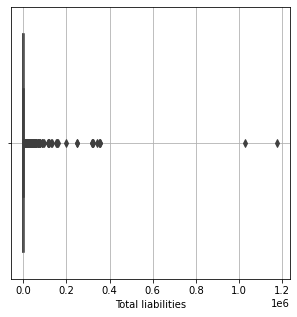

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


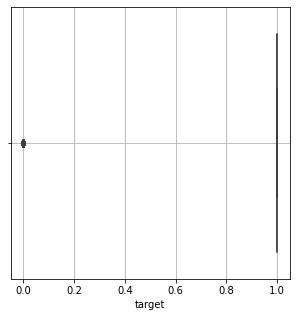

In [20]:
for i in data.columns:
    if data[i].dtype != "object":
        fig, ax = plt.subplots(figsize=(5,5 ))
        sas.boxplot(data[i])
        plt.grid()
        plt.show();

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


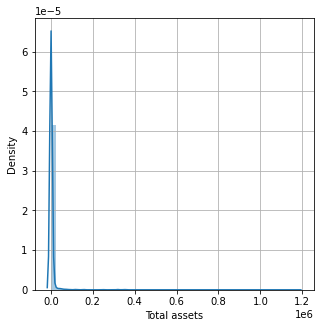

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


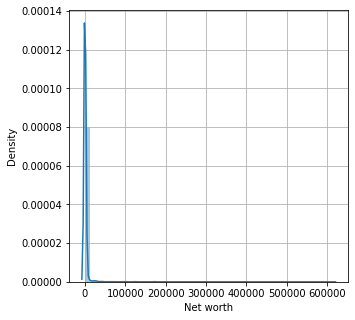

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


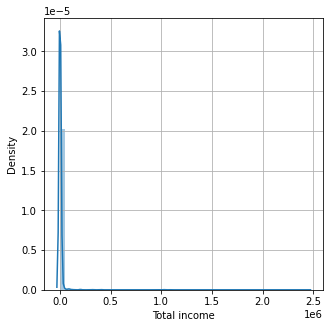

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


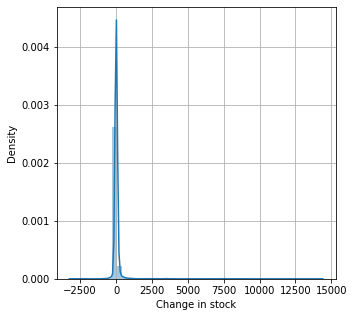

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


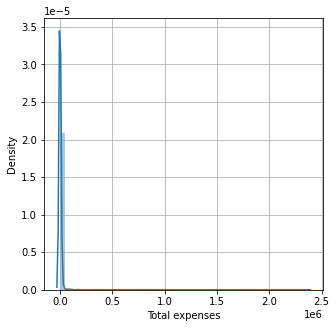

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


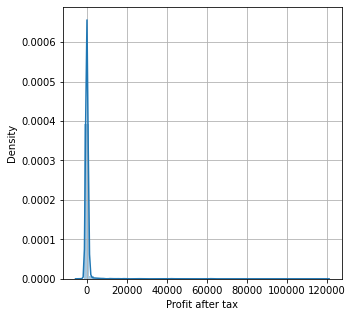

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


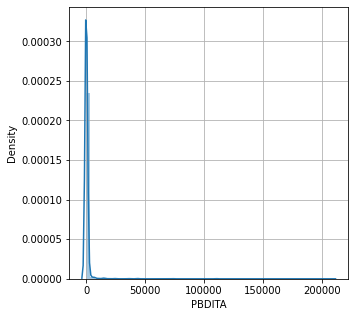

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


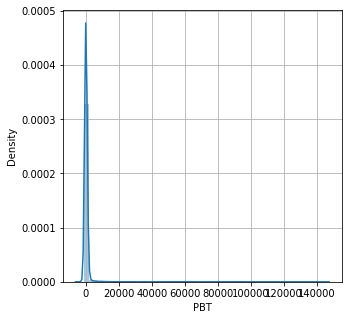

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


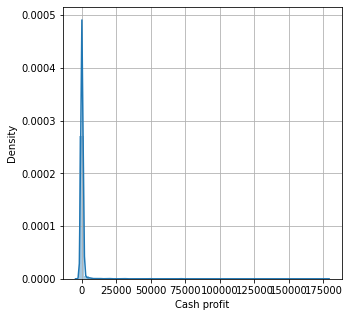

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


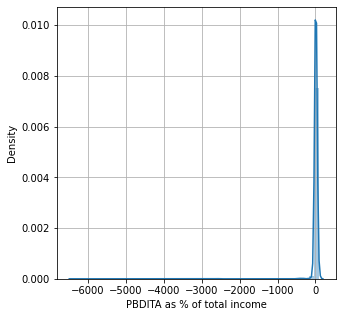

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


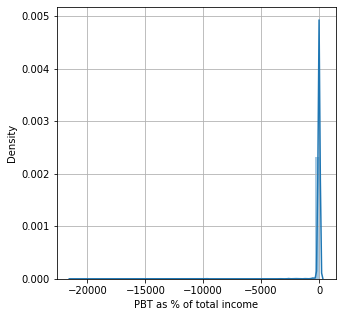

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


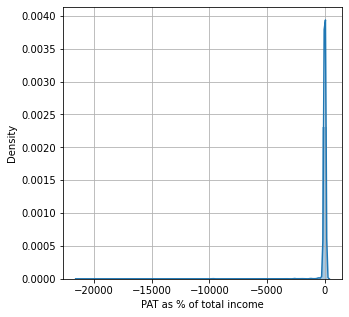

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


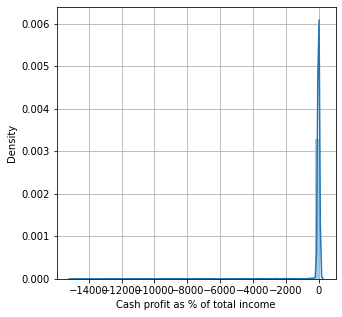

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


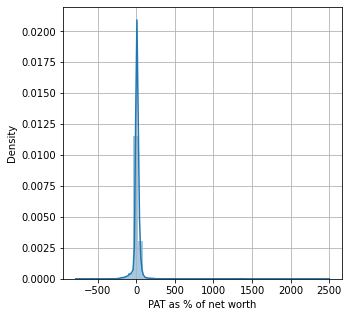

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


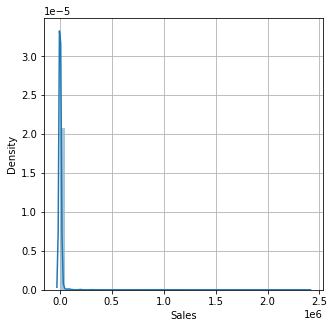

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


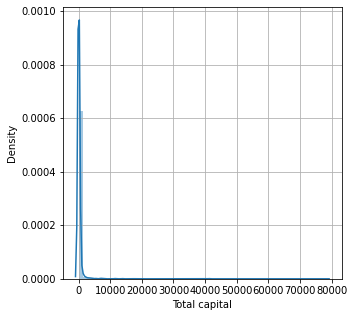

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


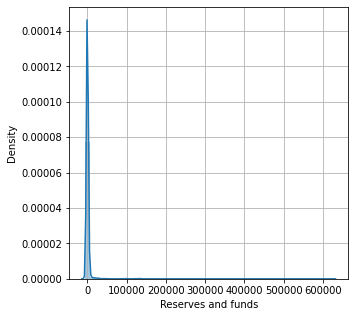

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


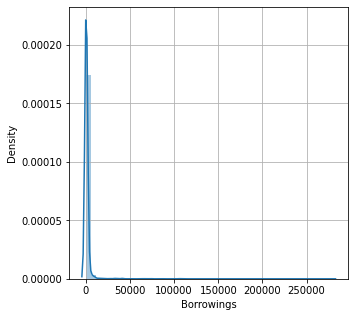

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


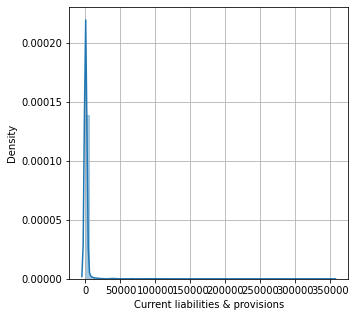

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


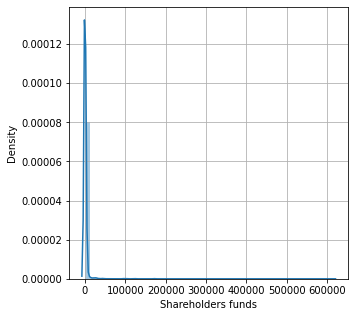

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


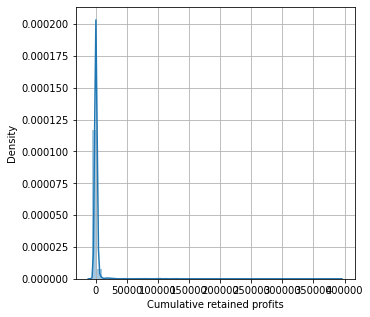

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


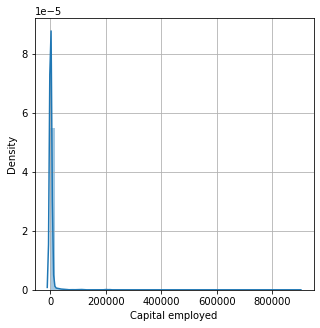

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


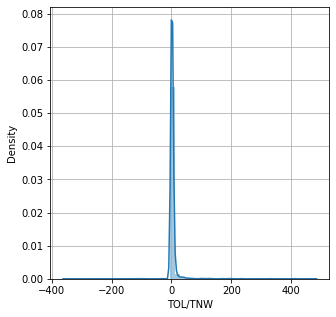

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


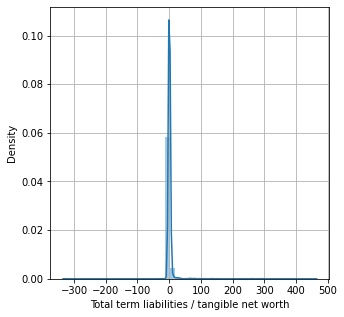

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


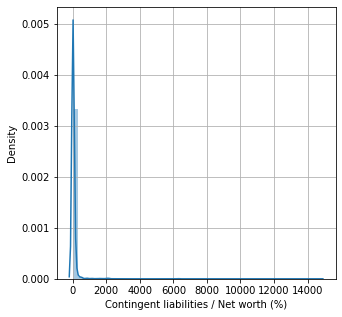

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


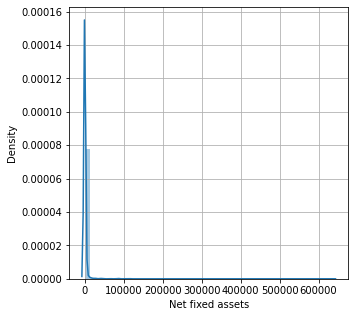

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


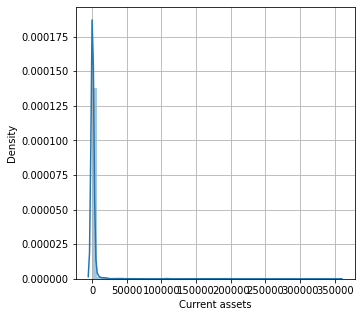

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


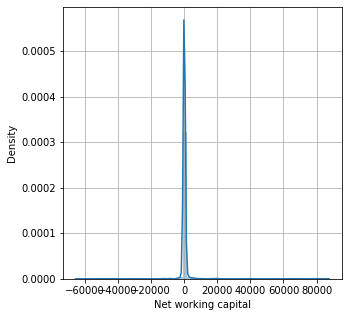

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


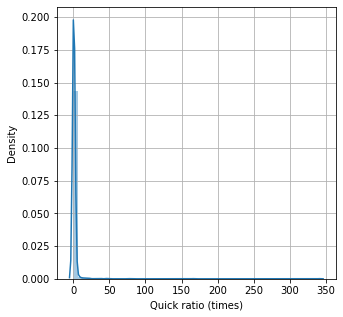

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


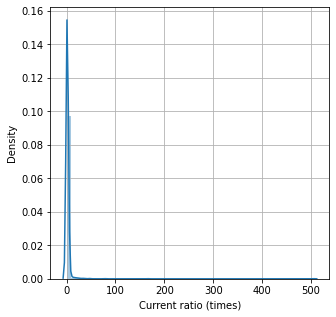

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


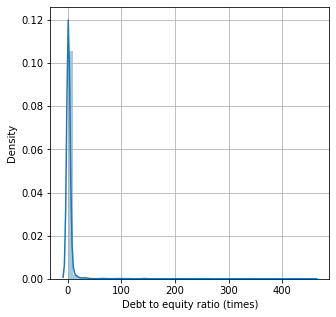

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


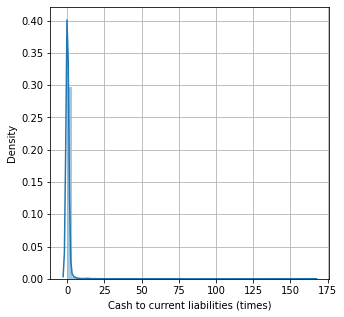

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


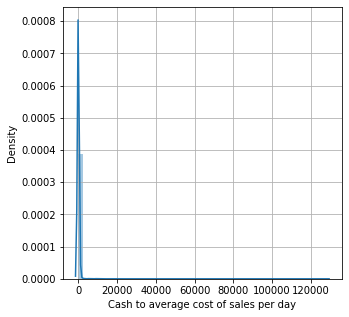

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


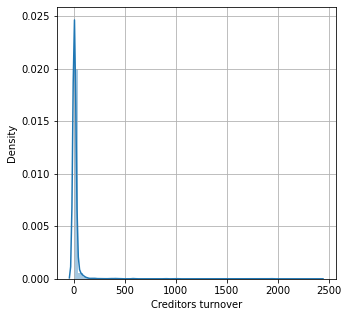

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


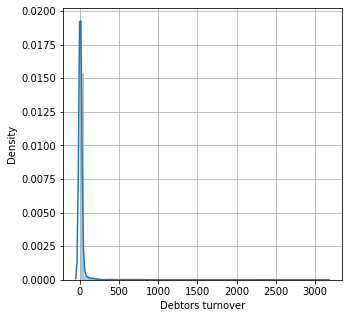

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


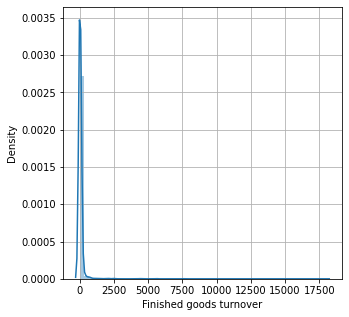

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


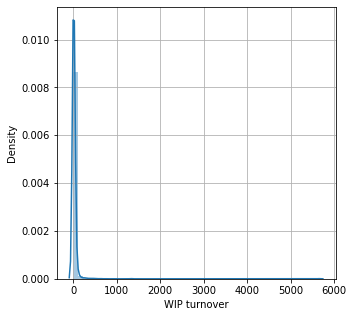

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


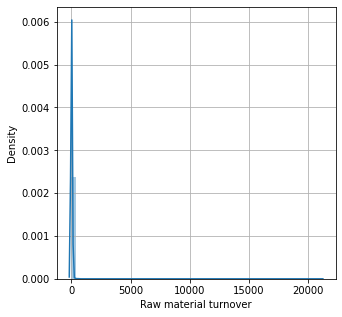

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


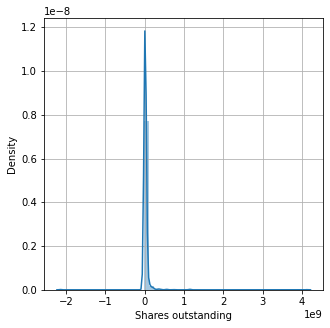

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


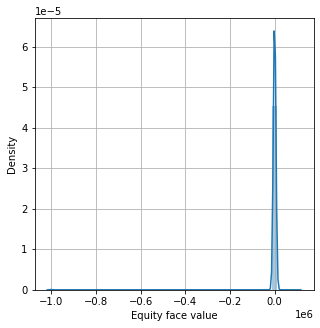

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


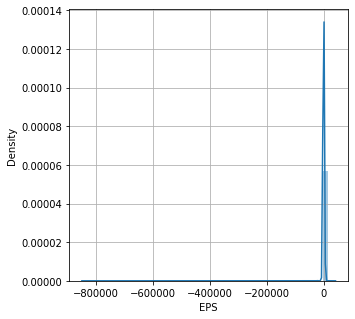

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


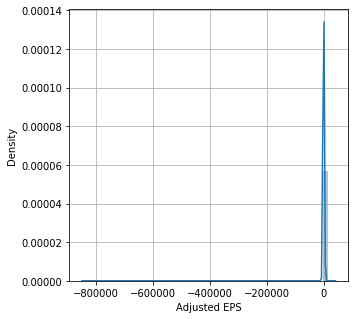

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


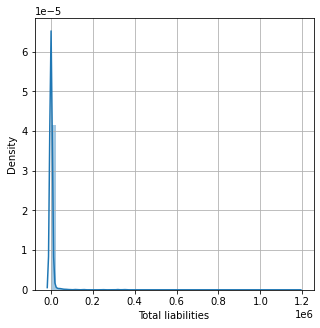

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


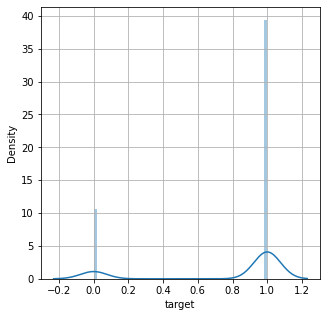

In [21]:
 for i in data.columns:
    if data[i].dtype != "object":
        fig = plt.subplots(figsize=(5,5 ))
        sas.distplot(data[i])
        plt.grid()
        plt.show();

# Outliers

In [22]:
Q1 = data.quantile(0.05)
Q3 = data.quantile(0.95)
IQR = Q3 - Q1

In [23]:
lower = (data < (Q1 - 1.5 * IQR)).sum()

In [24]:
lower

Total assets                                    0
Net worth                                       0
Total income                                    0
Change in stock                                32
Total expenses                                  0
Profit after tax                                5
PBDITA                                          0
PBT                                             3
Cash profit                                     3
PBDITA as % of total income                    54
PBT as % of total income                       84
PAT as % of total income                       94
Cash profit as % of total income               72
PAT as % of net worth                          29
Sales                                           0
Total capital                                   0
Reserves and funds                              1
Borrowings                                      0
Current liabilities & provisions                0
Shareholders funds                              0


In [25]:
upper = (data > (Q3 + 1.5 * IQR)).sum()

In [26]:
upper

Total assets                                    88
Net worth                                       89
Total income                                    89
Change in stock                                 71
Total expenses                                  83
Profit after tax                                84
PBDITA                                          92
PBT                                             95
Cash profit                                     89
PBDITA as % of total income                     32
PBT as % of total income                        10
PAT as % of total income                        13
Cash profit as % of total income                19
PAT as % of net worth                           20
Sales                                           87
Total capital                                   80
Reserves and funds                              89
Borrowings                                      91
Current liabilities & provisions                93
Shareholders funds             

In [27]:
total = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

In [28]:
total

Total assets                                    88
Net worth                                       89
Total income                                    89
Change in stock                                103
Total expenses                                  83
Profit after tax                                89
PBDITA                                          92
PBT                                             98
Cash profit                                     92
PBDITA as % of total income                     86
PBT as % of total income                        94
PAT as % of total income                       107
Cash profit as % of total income                91
PAT as % of net worth                           49
Sales                                           87
Total capital                                   80
Reserves and funds                              90
Borrowings                                      91
Current liabilities & provisions                93
Shareholders funds             

In [29]:
def outliers(col):
            sorted(col)
            Q1,Q3=np.percentile(col,[5,95])
            IQR=Q3-Q1
            lower_range= Q1-(1.5 * IQR)
            upper_range= Q3+(1.5 * IQR)
            return lower_range, upper_range


In [30]:
for column in data.columns:
        lr,ur=outliers(data[column])
        data[column]=np.where(data[column]>ur,ur,data[column])
        data[column]=np.where(data[column]<lr,lr,data[column])


In [31]:
total = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

In [32]:
total

Total assets                                   0
Net worth                                      0
Total income                                   0
Change in stock                                0
Total expenses                                 0
Profit after tax                               0
PBDITA                                         0
PBT                                            0
Cash profit                                    0
PBDITA as % of total income                    0
PBT as % of total income                       0
PAT as % of total income                       0
Cash profit as % of total income               0
PAT as % of net worth                          0
Sales                                          0
Total capital                                  0
Reserves and funds                             0
Borrowings                                     0
Current liabilities & provisions               0
Shareholders funds                             0
Cumulative retained 

# Multicolinearity

<AxesSubplot:>

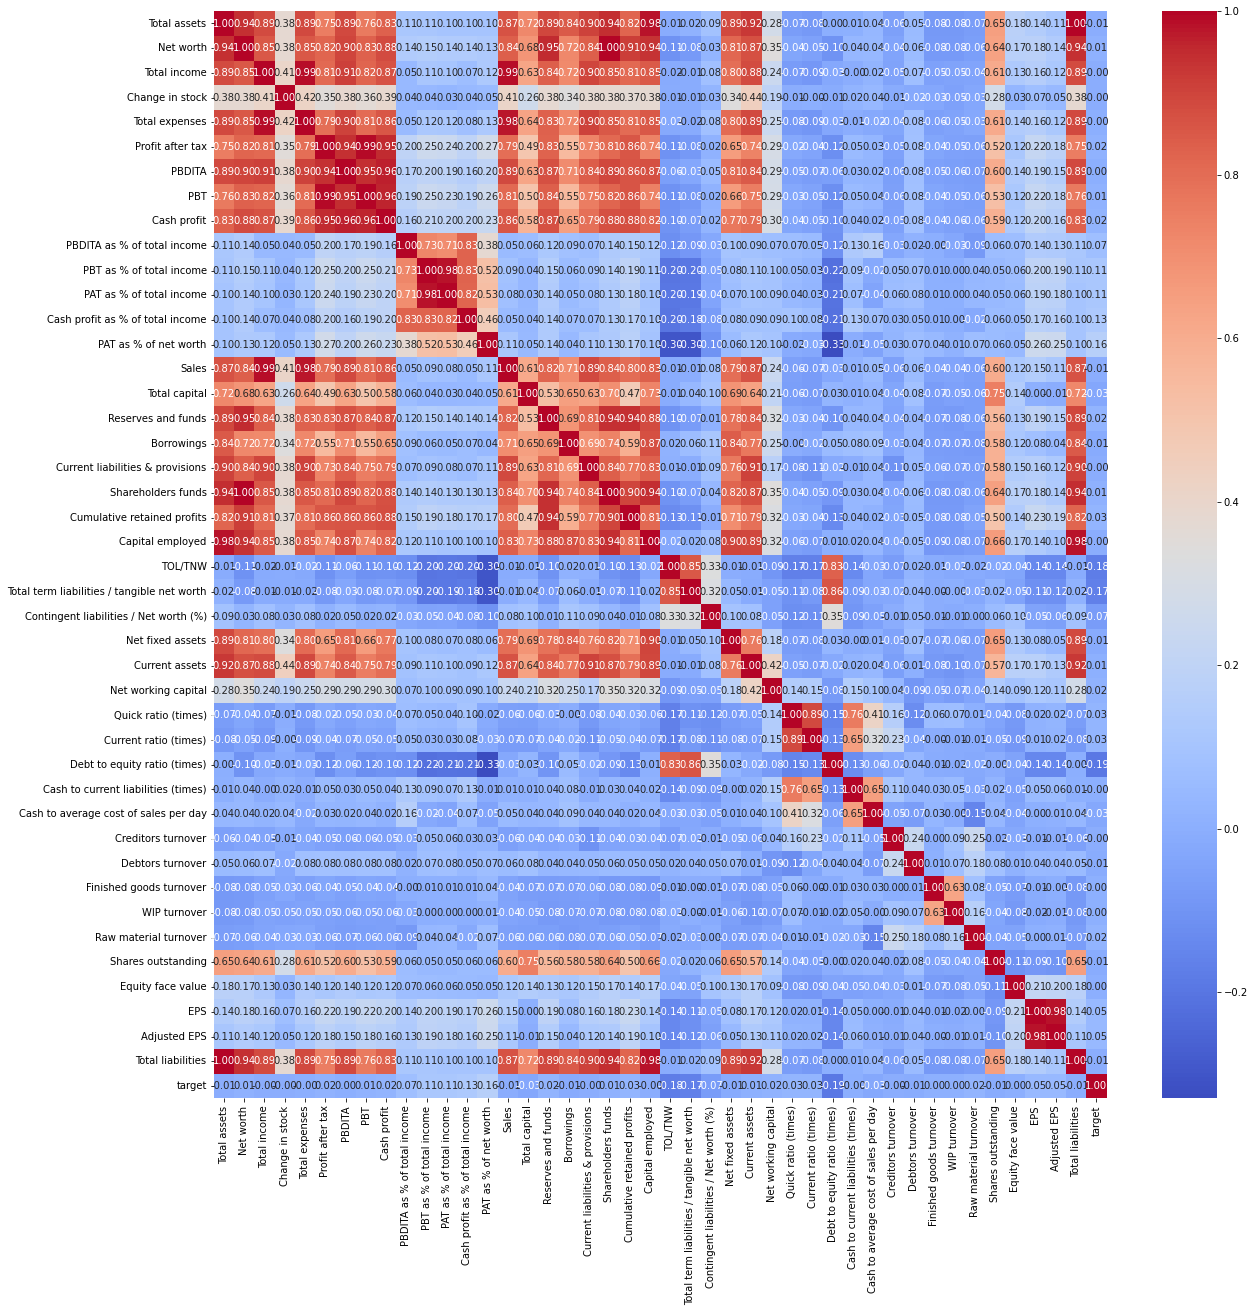

In [33]:
plt.figure(figsize= (20,20))
sas.heatmap(data.corr(),annot= True,fmt = '.2f', cmap='coolwarm')

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    
                vif =pd.DataFrame()
                vif["variable"] = x.columns
                vif["VIF"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
                return(vif)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [35]:
cal_vif(data).sort_values(by = 'VIF', ascending = False)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variable,VIF
0,Total assets,inf
42,Total liabilities,inf
19,Shareholders funds,198.405607
1,Net worth,189.073029
7,PBT,133.929259
21,Capital employed,108.978291
5,Profit after tax,107.448306
2,Total income,99.109734
4,Total expenses,65.229482
14,Sales,62.553446


In [36]:
data = data.drop(["Total assets"],axis =1)

In [37]:
cal_vif(data).sort_values(by = 'VIF', ascending = False)

,variable,VIF
18,Shareholders funds,198.405607
0,Net worth,189.073029
6,PBT,133.929259
41,Total liabilities,128.238773
20,Capital employed,108.978291
4,Profit after tax,107.448306
1,Total income,99.109734
3,Total expenses,65.229482
13,Sales,62.553446
5,PBDITA,59.083425


In [38]:
data = data.drop(["Shareholders funds","Net worth"],axis =1)

In [39]:
cal_vif(data).sort_values(by = 'VIF', ascending = False)

,variable,VIF
5,PBT,131.186261
39,Total liabilities,127.697424
3,Profit after tax,104.861914
0,Total income,98.847477
18,Capital employed,92.216981
2,Total expenses,64.809063
12,Sales,62.508480
4,PBDITA,58.443787
6,Cash profit,35.158418
8,PBT as % of total income,34.596876


In [40]:
data = data.drop(["PBT","Total liabilities"],axis =1)
cal_vif(data).sort_values(by = 'VIF', ascending = False)

,variable,VIF
0,Total income,98.103156
2,Total expenses,64.493839
11,Sales,62.293421
4,PBDITA,51.452463
5,Cash profit,33.806430
36,EPS,32.421298
7,PBT as % of total income,32.136291
37,Adjusted EPS,31.211966
8,PAT as % of total income,30.558228
17,Capital employed,30.003115


In [41]:
cal_vif(data).sort_values(by = 'VIF', ascending = False)

,variable,VIF
0,Total income,98.103156
2,Total expenses,64.493839
11,Sales,62.293421
4,PBDITA,51.452463
5,Cash profit,33.806430
36,EPS,32.421298
7,PBT as % of total income,32.136291
37,Adjusted EPS,31.211966
8,PAT as % of total income,30.558228
17,Capital employed,30.003115


In [42]:
data = data.drop(["Total income","Total expenses"],axis =1)

In [43]:
cal_vif(data).sort_values(by = 'VIF', ascending = False)

,variable,VIF
2,PBDITA,43.709771
3,Cash profit,33.260055
34,EPS,32.417932
5,PBT as % of total income,31.869507
35,Adjusted EPS,31.210076
6,PAT as % of total income,30.225577
15,Capital employed,29.929002
1,Profit after tax,25.582542
20,Current assets,19.284426
11,Reserves and funds,18.644168


In [44]:
data = data.drop(["PBDITA","Cash profit"],axis =1)
cal_vif(data).sort_values(by = 'VIF', ascending = False)

,variable,VIF
32,EPS,32.363113
3,PBT as % of total income,31.828377
33,Adjusted EPS,31.170555
4,PAT as % of total income,29.907120
13,Capital employed,28.009758
18,Current assets,19.218394
9,Reserves and funds,18.282267
12,Cumulative retained profits,13.827965
20,Quick ratio (times),12.869142
11,Current liabilities & provisions,12.751877


In [45]:
data = data.drop(["EPS","PBT as % of total income","Adjusted EPS","PAT as % of total income"],axis =1)
cal_vif(data).sort_values(by = 'VIF', ascending = False)

,variable,VIF
11,Capital employed,27.988655
16,Current assets,19.205427
7,Reserves and funds,18.252784
10,Cumulative retained profits,13.661694
18,Quick ratio (times),12.863082
9,Current liabilities & provisions,12.722954
19,Current ratio (times),10.954761
5,Sales,9.708795
15,Net fixed assets,8.593073
8,Borrowings,7.670050


In [46]:
data = data.drop(["Capital employed","Current assets"],axis =1)
cal_vif(data).sort_values(by = 'VIF', ascending = False)

,variable,VIF
7,Reserves and funds,15.250156
10,Cumulative retained profits,13.556711
16,Quick ratio (times),12.859390
17,Current ratio (times),10.945078
5,Sales,9.309941
9,Current liabilities & provisions,7.322777
14,Net fixed assets,7.154735
12,Total term liabilities / tangible net worth,6.613406
18,Debt to equity ratio (times),6.249168
11,TOL/TNW,6.044568


In [47]:
data = data.drop(["Reserves and funds","Cumulative retained profits"],axis =1)
cal_vif(data).sort_values(by = 'VIF', ascending = False)

,variable,VIF
14,Quick ratio (times),12.854932
15,Current ratio (times),10.939684
5,Sales,9.218827
8,Current liabilities & provisions,6.595829
10,Total term liabilities / tangible net worth,6.561519
12,Net fixed assets,6.539490
16,Debt to equity ratio (times),6.245944
9,TOL/TNW,6.020483
7,Borrowings,4.911913
2,PBDITA as % of total income,4.832812


In [48]:
data = data.drop(["Current ratio (times)","Quick ratio (times)"],axis =1)
cal_vif(data).sort_values(by = 'VIF', ascending = False)

,variable,VIF
5,Sales,9.196446
8,Current liabilities & provisions,6.591817
12,Net fixed assets,6.537211
10,Total term liabilities / tangible net worth,6.525207
14,Debt to equity ratio (times),6.245080
9,TOL/TNW,6.005597
7,Borrowings,4.906421
2,PBDITA as % of total income,4.784052
3,Cash profit as % of total income,3.999169
22,Shares outstanding,3.946616


In [49]:
data = data.drop(["Sales"],axis =1)
cal_vif(data).sort_values(by = 'VIF', ascending = False)

,variable,VIF
9,Total term liabilities / tangible net worth,6.521219
11,Net fixed assets,6.285483
13,Debt to equity ratio (times),6.245078
8,TOL/TNW,5.999475
6,Borrowings,4.891889
2,PBDITA as % of total income,4.773144
7,Current liabilities & provisions,4.353435
3,Cash profit as % of total income,3.994194
21,Shares outstanding,3.932377
5,Total capital,3.782514


In [ ]:
data = data.drop(["Net fixed assets","Total term liabilities / tangible net worth"],axis =1)
cal_vif(data).sort_values(by = 'VIF', ascending = False)

In [51]:
data.shape

(4256, 23)

<AxesSubplot:>

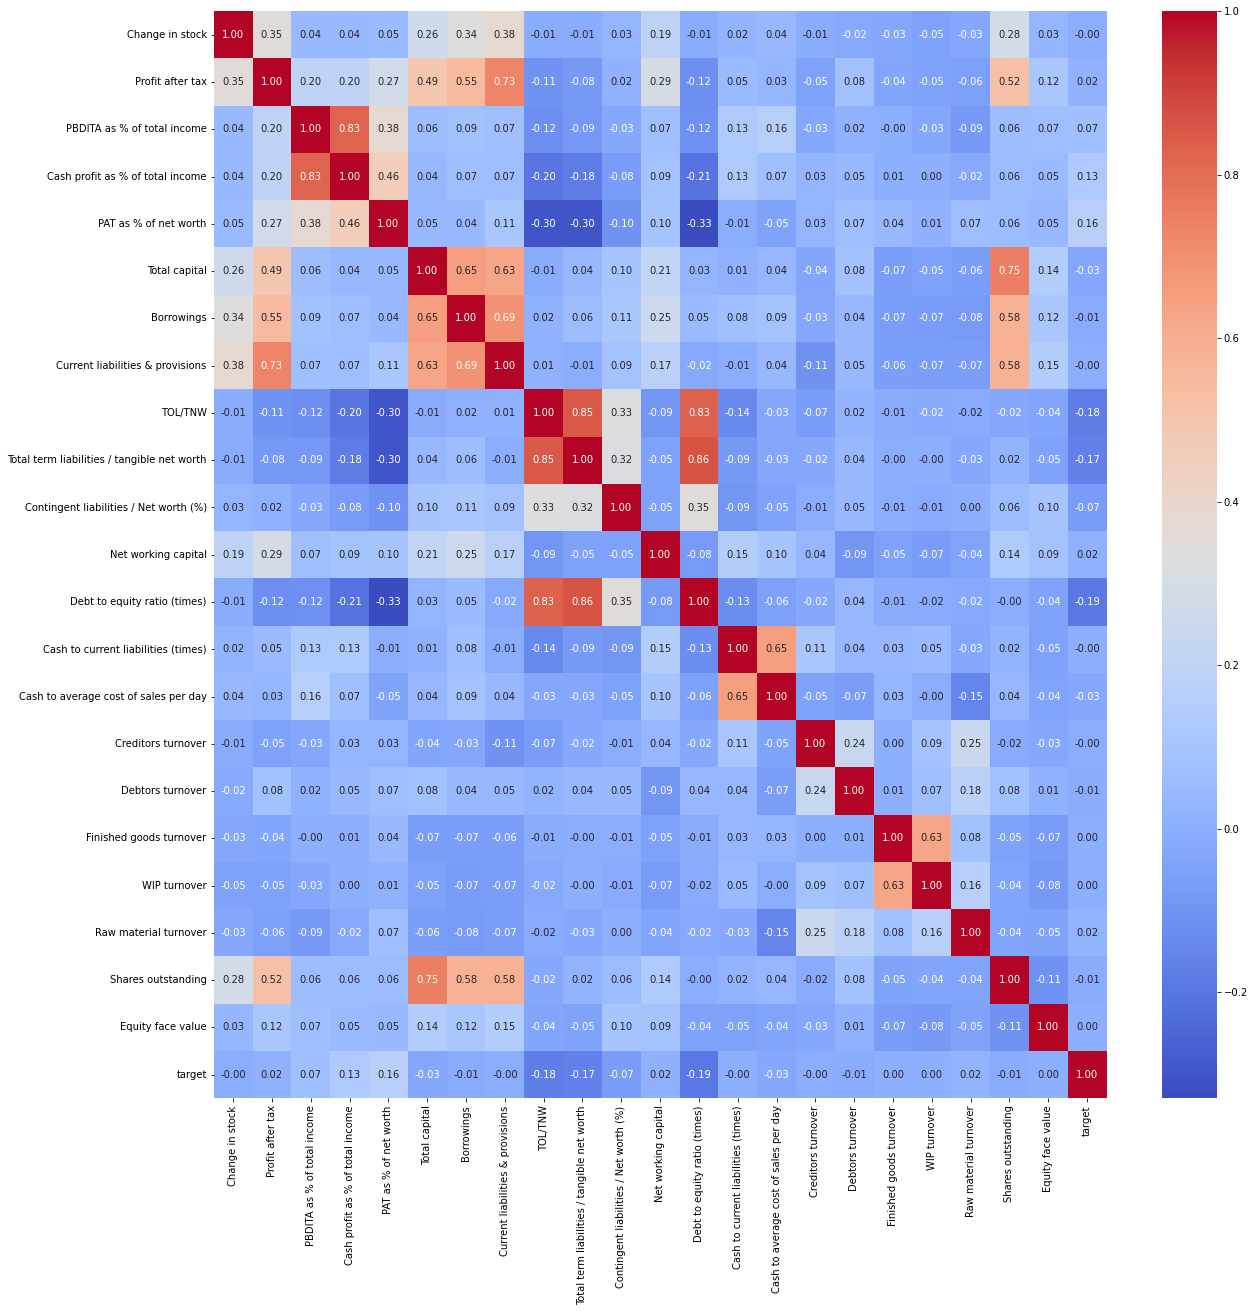

In [52]:
plt.figure(figsize= (20,20))
sas.heatmap(data.corr(),annot= True,fmt = '.2f', cmap='coolwarm')

# scaling


# split

In [53]:
x = data.drop(["target"],axis =1)
y = data["target"]
x_train ,x_test, y_train,y_test = train_test_split(x,y ,test_size=.30,random_state=1)

# scaling

In [54]:
from scipy.stats import zscore
data_z=x.apply(zscore)
data_z

,Change in stock,Profit after tax,PBDITA as % of total income,Cash profit as % of total income,PAT as % of net worth,Total capital,Borrowings,Current liabilities & provisions,TOL/TNW,Total term liabilities / tangible net worth,...,Debt to equity ratio (times),Cash to current liabilities (times),Cash to average cost of sales per day,Creditors turnover,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value
0,-0.107346,-0.231933,0.743878,0.787881,0.090211,-0.168800,-0.179787,-0.392263,-0.315259,0.007161,...,-0.180700,-0.371907,-0.383498,-0.054844,-0.393172,-0.686884,-0.678054,0.306315,-0.280174,0.424959
1,-0.317278,-0.356487,-0.449076,-0.189427,-0.283275,-0.430410,-0.483818,-0.413320,-0.262085,-0.396665,...,-0.339766,-0.444540,-0.427586,0.240631,0.283014,0.449531,0.275728,0.530835,0.242209,-1.964871
2,-0.493034,-0.354045,-0.214194,-0.184236,-0.128950,-0.385138,-0.460981,-0.331487,-0.225927,-0.334538,...,-0.376219,-0.135851,-0.139091,-0.585448,-0.566087,-0.493475,-0.474974,-0.204828,0.242209,-1.964871
3,2.317848,0.254423,-0.389737,-0.231609,0.117606,-0.125948,1.769558,2.325313,0.197338,-0.391487,...,0.074467,-0.353749,-0.261120,-0.515154,-0.599128,-0.486831,-0.103476,0.011545,-0.237006,0.424959
4,-0.230620,-0.370094,-0.581351,-0.303641,-0.328325,-0.434557,-0.476585,-0.423328,-0.415227,-0.277588,...,-0.386160,-0.390066,-0.436543,0.516009,3.040342,-0.094783,0.275181,0.702999,-0.581412,0.619635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,0.261284,0.661757,-0.695702,-0.368536,-0.283275,-0.469807,0.458629,0.563389,-0.587510,-0.505387,...,-0.565109,0.478657,1.242173,-0.712430,-0.704308,0.449531,0.275728,-0.859436,0.242209,-1.964871
4252,-0.270897,-0.356138,-0.038032,0.104544,-0.165172,-0.190227,-0.465207,-0.403208,-0.413100,-0.267233,...,-0.412671,-0.426382,-0.417931,-0.436924,-0.605185,-0.587776,-0.493059,-0.084882,-0.300970,0.424959
4253,0.119672,0.313386,0.234555,0.246662,0.737952,-0.212690,-0.465288,-0.316997,-0.555606,-0.505387,...,-0.545226,-0.444540,-0.441546,0.895822,-0.369492,0.094808,0.368244,-0.085666,-0.324746,0.424959
4254,-0.215974,-0.362069,-0.153001,0.024724,-0.159084,-0.432830,-0.486500,-0.403417,-0.391830,-0.412196,...,-0.475635,-0.317433,-0.310094,-0.365497,-0.500005,0.373468,-0.371361,0.312586,0.242209,-1.964871


In [55]:
x_train ,x_test, y_train,y_test = train_test_split(x,y ,test_size=.30,random_state=1)

In [56]:
x_train ,x_test, y_train,y_test = train_test_split(x,y ,test_size=.30,random_state=1)

# Logistic regression

In [57]:
lr  = LogisticRegression()

In [58]:
lr.fit(x_train,y_train)

LogisticRegression()

In [59]:
y_train_pred = lr.predict(x_train)

In [60]:
accuracy_score(y_train,y_train_pred)

0.7928835179590467

In [61]:
y_test_pred = lr.predict(x_test)

In [62]:
accuracy_score(y_test,y_test_pred)

0.7736883320281911

In [63]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       288
         1.0       0.77      1.00      0.87       989

    accuracy                           0.77      1277
   macro avg       0.39      0.50      0.44      1277
weighted avg       0.60      0.77      0.68      1277



<AxesSubplot:>

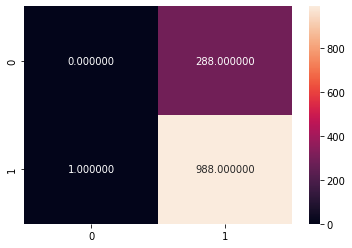

In [64]:
sas.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt = "2f")

# Random forest

In [65]:
rr = RandomForestClassifier()

In [70]:
parameter = {
    "max_depth" : [6,7,10],
    "max_features" : [ 3,4,5,6],
    "min_samples_leaf" : [25,50,100,75 ],
        "min_samples_split" : [ 50,100,150,300],
            "n_estimators" : [301,501],
                   "oob_score" : [True]
        
    
    
    
    
    }

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
grid_search = GridSearchCV(estimator=rr, param_grid= parameter, cv = 5,n_jobs=-1)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
gs_pred = grid_search.predict(x_test)

In [ ]:
accuracy_score(y_test,gs_pred)

In [ ]:
grid_search.best_params_

In [ ]:
sas.heatmap(confusion_matrix(y_test,gs_pred),annot=True,fmt = '.2f', cmap="coolwarm")

In [ ]:
print(classification_report(y_test,gs_pred))